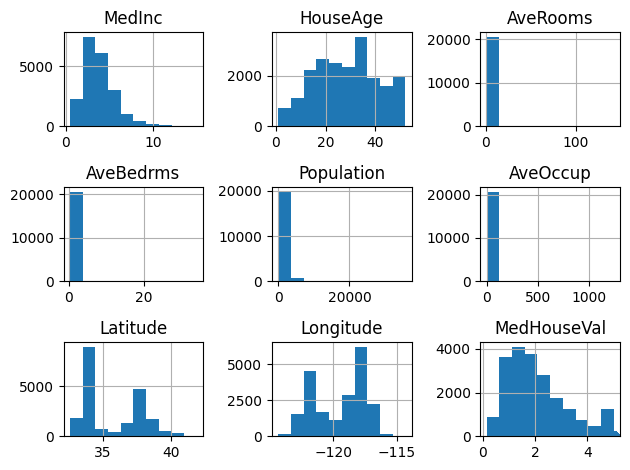

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
import pandas as pd

X, y = fetch_california_housing(return_X_y=True)
df = fetch_california_housing(as_frame=True).frame
df.hist()
plt.tight_layout()


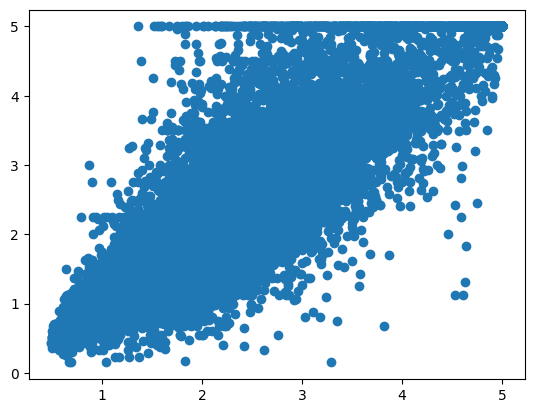

In [27]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
    ])
# pipe.get_params()
mod = GridSearchCV(estimator=pipe, param_grid={"model__n_neighbors": [1,2,3,4,5,6,7,8,9,10]}, cv=3)
mod.fit(X, y)
pd.DataFrame(mod.cv_results_) 
mod = KNeighborsRegressor()
mod.fit(X, y)
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=10))
    ])
pipe.fit(X, y)
pred = pipe.predict(X)
plt.scatter(pred, y)